# Background

## Data Description

Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.


### Attributes:

| Column	|Description|
|-|-|
|age	|Age of customer (numeric)|
|job	|Type of job (categorical)|
|marital	|Marital status (categorical)|
|education	|Education level (categorical)|
|default	|Has credit in default? (binary)|
|balance	|Average yearly balance, in euros (numeric)|
|housing	|Has a housing loan? (binary)|
|loan	|Has personal loan? (binary)|
|contact	|Contact communication type (categorical)|
|day	|Last contact day of the month (numeric)|
|month	|Last contact month of the year (categorical)|
|duration	|Last contact duration, in seconds (numeric)|
|campaign	|Number of contacts performed during this campaign and for this client (numeric, includes last contact)|

### Output (desired target):

$y$ - has the client subscribed to a term deposit? (binary)

### Goal(s):

- Predict if the customer will subscribe (yes/no) to a term deposit (variable y)
- Find customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.
- What makes the customers buy? 


### Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns

In [2]:
csv_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw', 'term-deposit-marketing-2020.csv'))

## Exploratory data analysis using, JupySQL, SQL queries and DuckDB

**Note**

The queries below asume the usage of JupySQL and Jupyter notebooks.

Ensure the following are installed

```
duckdb-engine
jupysql
```

In [3]:
%load_ext sql
%sql duckdb:///:memory:

In [10]:
query = f"""
CREATE TABLE term_deposit_marketing AS SELECT * FROM read_csv_auto('{csv_path}')
"""

%sql {{query}}


*  duckdb:///:memory:
Done.


Count
40000


In [13]:
f5 = """
    SELECT * FROM term_deposit_marketing LIMIT 5;
"""

%sql {{f5}}

*  duckdb:///:memory:
Done.


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Find the total number of customers in each job category

*  duckdb:///:memory:
Done.


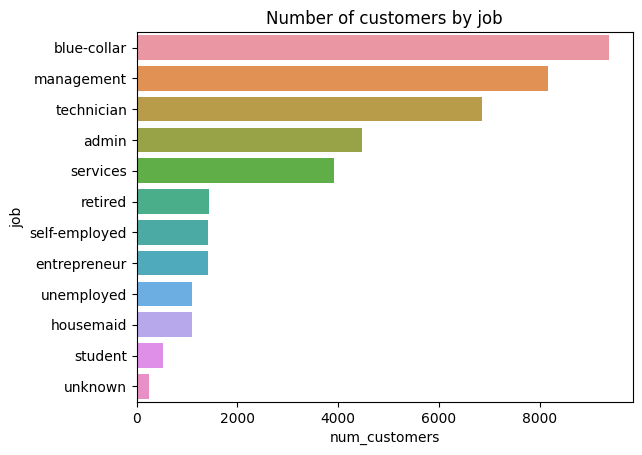

In [19]:
q_jobs = """
SELECT job, COUNT(*) as num_customers
FROM term_deposit_marketing
GROUP BY job
ORDER BY num_customers DESC;
"""

jobs = %sql {{q_jobs}}
jobs_df = jobs.DataFrame()

sns.barplot(x='num_customers', y='job', data=jobs_df)
plt.title('Number of customers by job')
plt.show()

### Find the average balance for each marital status:

*  duckdb:///:memory:
Done.


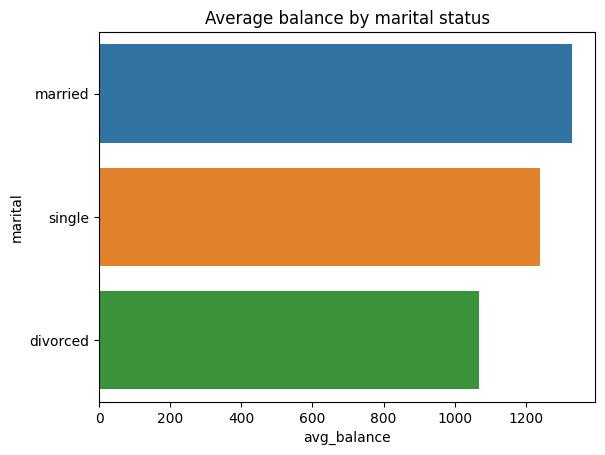

In [20]:
q_balance_ms = """
SELECT marital, AVG(balance) as avg_balance
FROM term_deposit_marketing
GROUP BY marital;
"""

balance_ms = %sql {{q_balance_ms}}
balance_ms_df = balance_ms.DataFrame()

sns.barplot(x='avg_balance', y='marital', data=balance_ms_df)
plt.title('Average balance by marital status')
plt.show()

### Find the number of customers with and without a housing loan:


*  duckdb:///:memory:
Done.


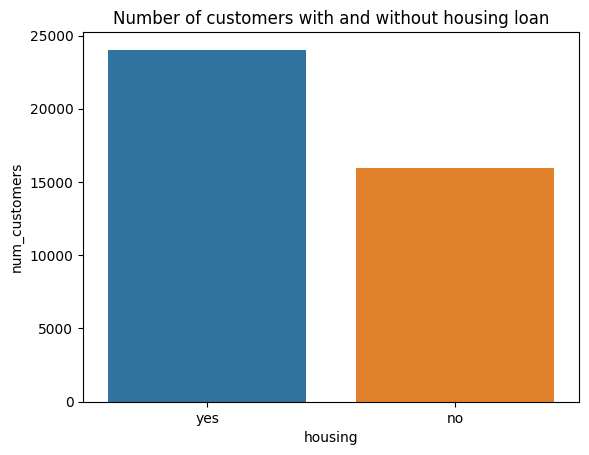

In [22]:
housing_q = """ 
SELECT housing, COUNT(*) as num_customers
FROM term_deposit_marketing
GROUP BY housing;
"""

housing = %sql {{housing_q}}
housing_df = housing.DataFrame()

sns.barplot(x='housing', y='num_customers', data=housing_df)
plt.title('Number of customers with and without housing loan')
plt.show()

### Find the top 10 customers with the highest balance:

In [70]:
top_10_q = """
SELECT age, job, marital, education, balance
FROM term_deposit_marketing
ORDER BY balance DESC
LIMIT 10;
"""

top_10 = %sql {{top_10_q}}
top_10_df = top_10.DataFrame()

top_10_df

*  duckdb:///:memory:
Done.


,age,job,marital,education,balance
0,51,management,single,tertiary,102127
1,59,management,married,tertiary,98417
2,56,management,divorced,tertiary,66721
3,52,blue-collar,married,primary,66653
4,59,admin,married,unknown,64343
5,56,blue-collar,married,secondary,58932
6,44,admin,married,secondary,58544
7,50,services,married,secondary,57435
8,43,admin,single,secondary,56831
9,40,management,married,tertiary,52527


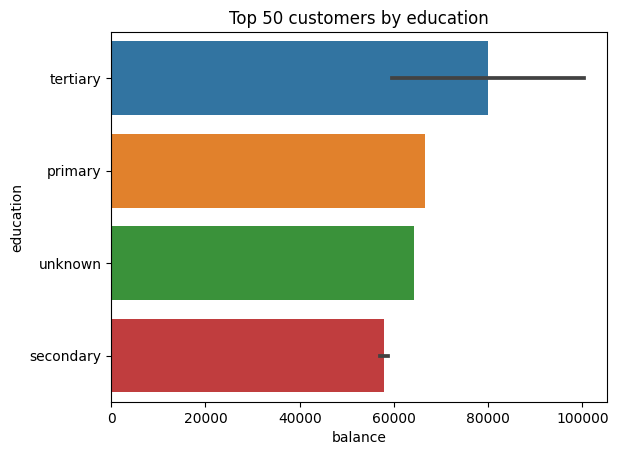

In [71]:
sns.barplot(x='balance', y='education', data=top_10_df)
plt.title('Top 50 customers by education')
plt.show()

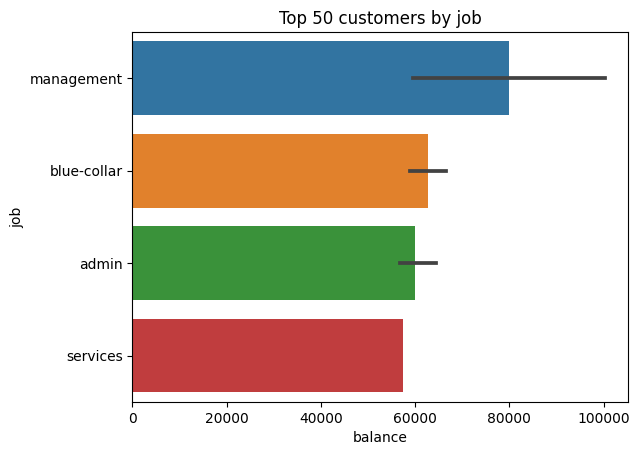

In [72]:
sns.barplot(x='balance', y='job', data=top_10_df)
plt.title('Top 50 customers by job')
plt.show()

### Find the number of customers who subscribed to a term deposit (y = 'yes') by job category:

*  duckdb:///:memory:
Done.


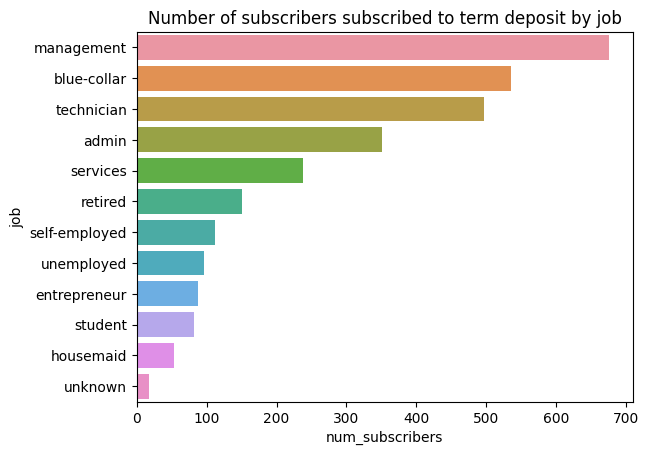

In [68]:
term_deposit_q = """
SELECT job, COUNT(*) as num_subscribers
FROM term_deposit_marketing
WHERE y = 'yes'
GROUP BY job
ORDER BY num_subscribers DESC;
"""

term_deposit = %sql {{term_deposit_q}}
term_deposit_df = term_deposit.DataFrame()

sns.barplot(x='num_subscribers', y='job', data=term_deposit_df)
plt.title('Number of subscribers subscribed to term deposit by job')
plt.show()

### Showing number of customers by age brackets and marital status

*  duckdb:///:memory:
Done.


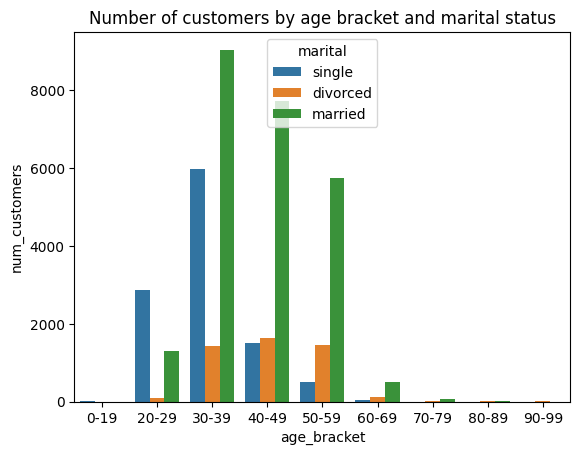

In [65]:
age_bracket_q = """
SELECT 
    CASE
        WHEN age BETWEEN 0 AND 19 THEN '0-19'
        WHEN age BETWEEN 20 AND 29 THEN '20-29'
        WHEN age BETWEEN 30 AND 39 THEN '30-39'
        WHEN age BETWEEN 40 AND 49 THEN '40-49'
        WHEN age BETWEEN 50 AND 59 THEN '50-59'
        WHEN age BETWEEN 60 AND 69 THEN '60-69'
        WHEN age BETWEEN 70 AND 79 THEN '70-79'
        WHEN age BETWEEN 80 AND 89 THEN '80-89'
        WHEN age BETWEEN 90 AND 99 THEN '90-99'
        ELSE '100+'
    END as age_bracket,
    marital,
    COUNT(*) as num_customers
FROM term_deposit_marketing
GROUP BY age_bracket, marital
ORDER BY age_bracket, marital;
"""

age_bracket = %sql {{age_bracket_q}}
age_bracket_df = age_bracket.DataFrame()

sns.barplot(x='age_bracket', y='num_customers', hue='marital', data=age_bracket_df)
plt.title('Number of customers by age bracket and marital status')
plt.show()